----------------------------------

# Visão Geral

- Exercícios: 15 min 

### Requisitos:
- Conhecimentos básicos da linguagem Python
- Conhecimentos básicos em Notebook Jupyter
- Leitura da lição de noções básicas de imagens digitais
- Leitura da lição de Transformações de imagens digitais e Operações aritméticas em imagens digitais
- Leitura da lição de Suavização de imagens digitais

---------------------------

### 1. Escolha e aplique o método de suavização aprendido na lição mais adequado para remover os ruídos presentes na imagem abaixo. Dica: os ruídos presentes na imagem são do tipo sal e pimenta.

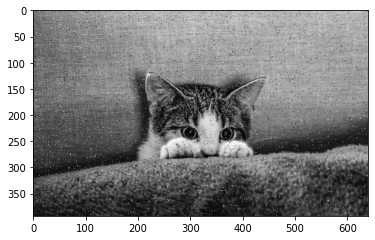

In [1]:
### importação da biblioteca opencv, matplotlib, numpy
import cv2
import matplotlib.pyplot as plt
import numpy as np

# abrindo a imagem
imagem = cv2.imread('../../figures/gato.jpg')
# converte imagem para tons de cinza (gray)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Normalizando os valores dos pixels da imagem
imagem = imagem / 255.0

# aplicando o ruído de sal e pimenta na imagem
ruido = np.random.randint(101, size = (imagem.shape[0], imagem.shape[1]))

imagem_ruido_salepimenta = np.where(ruido == 0, 0, imagem)
imagem_ruido_salepimenta = np.where(ruido == (100-1), 1, imagem_ruido_salepimenta)

# convertendo a imagem para 8bits e valores de pixels entre 0 e 255
imagem_ruido_salepimenta = (imagem_ruido_salepimenta * 255).astype("uint8")

# mostrando a imagem do ruido
plt.imshow(imagem_ruido_salepimenta, cmap='gray')

#### Aplicando o filtro da mediana para remover os ruídos da imagem

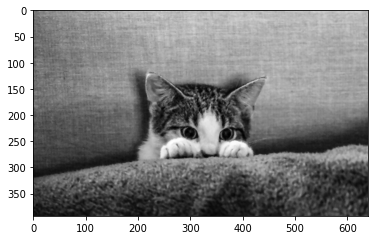

In [2]:
# aplicando o filtro da mediana
imagem_suavizada_mediana = cv2.medianBlur(imagem_ruido_salepimenta, 3)

# mostrando imagem suavizada
plt.imshow(imagem_suavizada_mediana, cmap='gray')

### 2. Escolha e aplique o método de suavização aprendido na lição mais adequado para remover os ruídos presentes na imagem abaixo. Dica: os ruídos presentes na imagem são do tipo gaussianos.

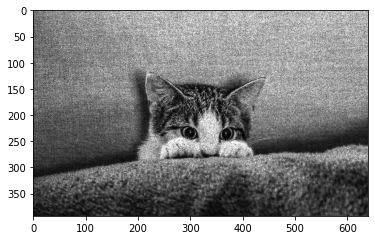

In [3]:
# abrindo a imagem
imagem = cv2.imread('../../figures/gato.jpg')
# converte imagem para tons de cinza (gray)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# aplicando o ruído gaussiano
mean = 0.1
var = 1
sigma = var ** 0.5

imagem = imagem / 255.0
ruido_gaussiano = np.random.normal(mean, sigma, imagem.shape)
imagem_ruido_gaussiano = np.clip((imagem * (1 + ruido_gaussiano * 0.2)),0,1)

# convertendo a imagem para 8bits e valores de pixels entre 0 e 255
imagem_ruido_gaussiano = (imagem_ruido_gaussiano * 255).astype("uint8")

# mostrando a imagem do ruido
plt.imshow(imagem_ruido_gaussiano, cmap='gray')

#### Aplicando o filtro gaussiano para remover os ruídos da imagem

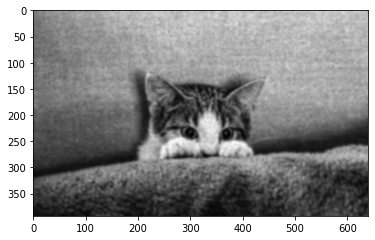

In [6]:
# aplicando a suavização da imagem com uma mascara 9x9
imagem_suavizada_gaussiana = cv2.GaussianBlur(imagem_ruido_gaussiano, (9,9), 0)

# mostrando imagem suavizada
plt.imshow(imagem_suavizada_gaussiana, cmap="gray")

#### Compare os resultados dos filtros aprendidos na lição de suavização.